In [5]:
import torch
import pyro.distributions as dist
import matplotlib.pyplot as plt

In [33]:
x = torch.rand(10000, 2)
ok = (x - torch.tensor([0.5, 0.2])).pow(2).sum(-1).sub(0.2).abs().gt(0.1)
x = x[ok]
x += torch.randn(x.shape) / 20
data = x
len(data)

6233

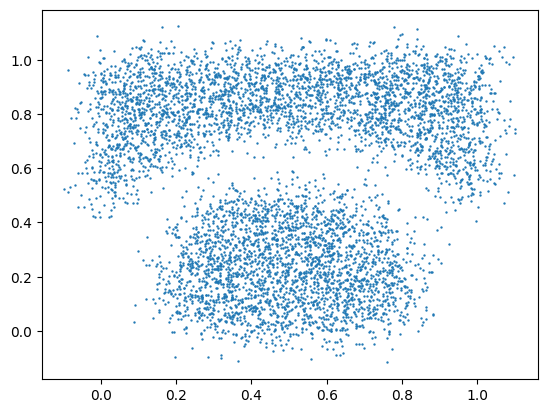

In [37]:
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), 0.5);

In [48]:
flow = dist.transforms.spline_coupling(2, count_bins=16)
q = dist.TransformedDistribution(dist.Normal(torch.zeros(2), 1).to_event(1), flow)

In [49]:
%%time
optimizer = torch.optim.Adam(flow.parameters(), lr=0.01)
for step in range(501):
    optimizer.zero_grad()
    loss = -q.log_prob(data).mean()
    loss.backward()
    optimizer.step()
    flow.clear_cache()
    if step % 100 == 0:
        print(f'step: {step}, loss: {loss}')

step: 0, loss: 7.227046966552734
step: 100, loss: 0.3738403618335724
step: 200, loss: 0.03983582928776741
step: 300, loss: -0.03446740284562111
step: 400, loss: -0.06263186782598495
step: 500, loss: -0.07253885269165039
CPU times: user 11.2 s, sys: 8.05 s, total: 19.3 s
Wall time: 10.1 s


In [65]:
for p in flow.parameters():
    p.detach_()

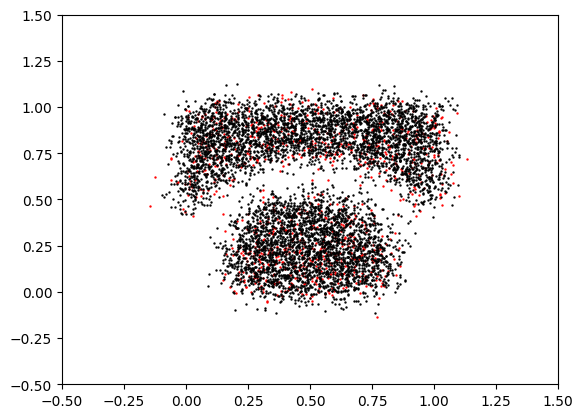

In [66]:
y = q.sample([1000])
assert not y.requires_grad
plt.scatter(y[:, 0].numpy(), y[:, 1].numpy(), 0.5, color="red")
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), 0.5, color="black")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5);

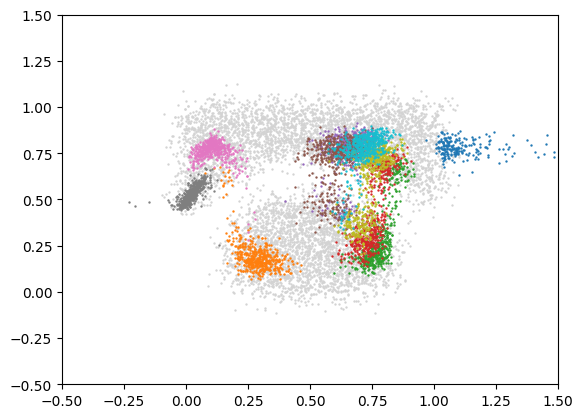

In [71]:
plt.scatter(data[:, 0].numpy(), data[:, 1].numpy(), 0.5, color="lightgray")
for i in range(10):
    z = dist.Normal(torch.randn(2), 0.2).sample([500])
    z = flow(z)
    plt.scatter(z[:, 0].numpy(), z[:, 1].numpy(), 0.5)
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5);